In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
dfsal=pd.read_csv(r"E:\Feature engineering\Data Set set\linear Regression\Linear Regression\Polynomial\salary_poly.csv")
dfsal

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
dfsal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [6]:
dfsal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
dfsal.drop("Position",axis=1,inplace= True)
dfsal

KeyError: "['Position'] not found in axis"

In [10]:
x= dfsal[['Level']]
y= dfsal['Salary']
display(x,y)

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

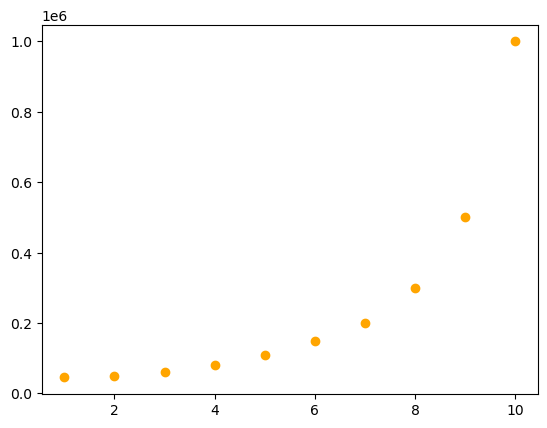

In [12]:
plt.scatter(x,y, color= "orange")
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
lreg= LinearRegression()
lreg

LinearRegression()

In [19]:
lreg.fit(x,y)

LinearRegression()

In [20]:
lreg.score(x,y)

0.6690412331929895

In [21]:
# The predicted value means differce between the original value and score is know as predicated value i.e y=y-y^
lreg.predict(x)

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [23]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

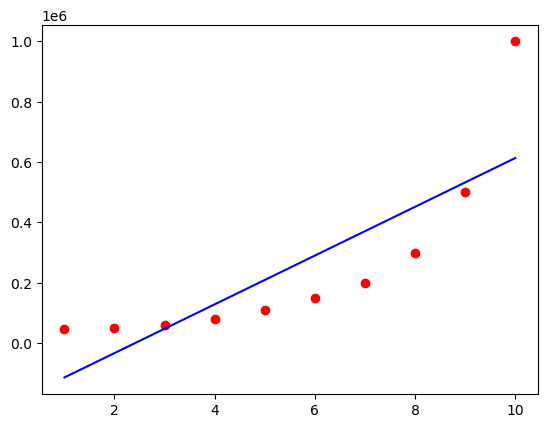

In [26]:
plt.scatter(x,y,color="red")
plt.plot(x,lreg.predict(x),color="b")
plt.show()

## Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures()
poly

PolynomialFeatures()

In [28]:
poly.fit(x)


PolynomialFeatures()

In [30]:
xpoly=poly.transform(x)
print(x)
xpoly

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [31]:
lreg2=LinearRegression()
lreg2

LinearRegression()

In [33]:
lreg2.fit(xpoly,y)

LinearRegression()

In [34]:
lreg2.score(xpoly,y)

0.9162082221443942

In [38]:
predict=lreg2.predict(xpoly)
predict

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

In [37]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

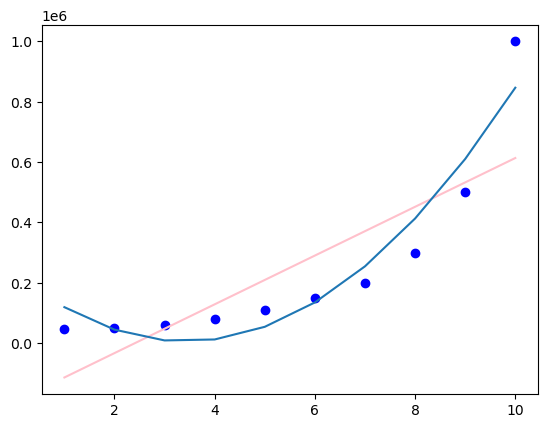

In [44]:
plt.scatter(x,y,color="blue")
plt.plot(x,lreg.predict(x),color="pink")
plt.plot(x,lreg2.predict(xpoly))
plt.show()

## Polynomial Regression With Degree - 3

In [50]:
poly3=PolynomialFeatures(degree=3)
poly3.fit(x)
xpoly3=poly3.transform(x)
xpoly3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [51]:
lreg3=LinearRegression()
lreg3.fit(xpoly3,y)
lreg3.score(xpoly3,y)

0.9812097727913367

In [52]:
predict3 = lreg3.predict(xpoly3)
predict3

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622377,
        83270.3962704 , 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846153])

In [53]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

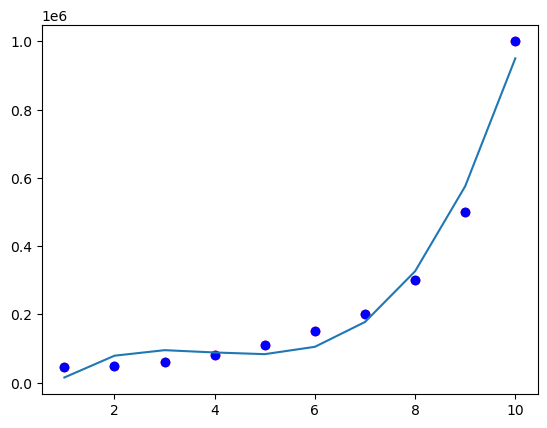

In [66]:
plt.scatter(x,y, color = "red")
plt.scatter(x,y,color="blue")
plt.plot(x,lreg3.predict(xpoly3))

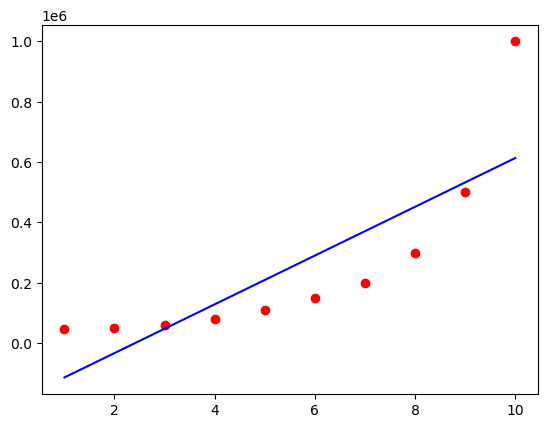

In [59]:
plt.scatter(x,y,color="red")
plt.plot(x,lreg.predict(x),color="b")
plt.show()

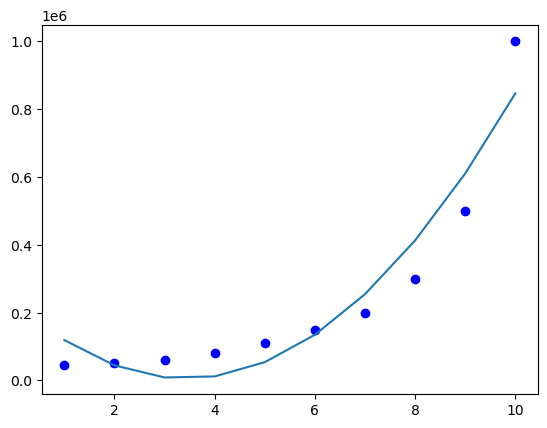

In [61]:
plt.scatter(x,y,color="blue")
plt.plot(x,lreg2.predict(xpoly))
plt.show()

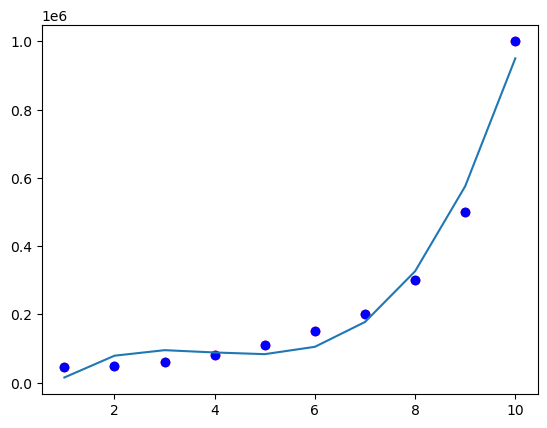

In [64]:
plt.scatter(x,y, color = "red")
plt.scatter(x,y,color="blue")
plt.plot(x,lreg3.predict(xpoly3))

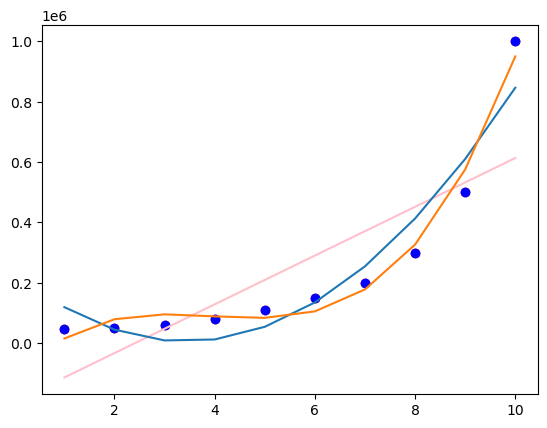

In [65]:
plt.scatter(x,y, color = "red")
plt.scatter(x,y,color="blue")
plt.plot(x,lreg.predict(x),color="pink")
plt.plot(x,lreg2.predict(xpoly))
plt.plot(x,lreg3.predict(xpoly3))

In [67]:
poly4=PolynomialFeatures(degree=4)
poly4.fit(x)
xpoly4=poly4.transform(x)
xpoly4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [68]:
lreg4=LinearRegression()
lreg4.fit(xpoly4,y)
lreg4.score(xpoly4,y)

0.9973922891706614

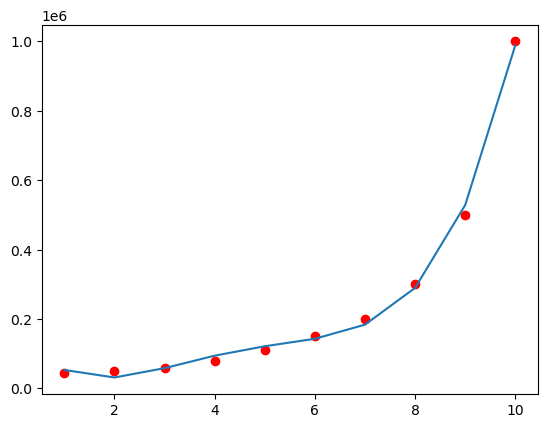

In [70]:
plt.scatter(x,y, color = "red")
plt.plot(x,lreg4.predict(xpoly4))